<a href="https://colab.research.google.com/github/Anirudh2465/Semester1/blob/Network-Anomaly-Detection/UNSW_NB15_using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-learn

Confusion Matrix:
 [[ 56000      0]
 [     0 119341]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56000
           1       1.00      1.00      1.00    119341

    accuracy                           1.00    175341
   macro avg       1.00      1.00      1.00    175341
weighted avg       1.00      1.00      1.00    175341



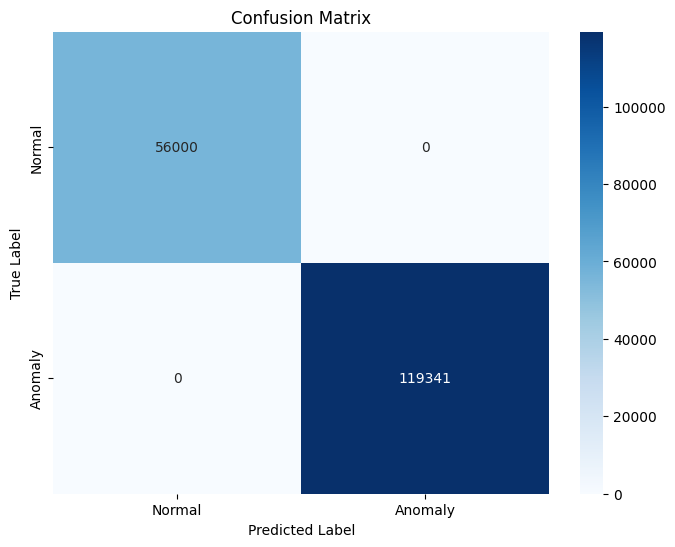

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Load training data
train_data = pd.read_csv('/UNSW_NB15_training-set (1).csv')

# Assuming 'label' column contains the labels (0 for normal, 1 for anomaly)
train_data = train_data.dropna(subset=['label'])  # Drop rows with NaN in the target variable
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']

# Load testing data
test_data = pd.read_csv('/UNSW_NB15_testing-set(1).csv')

# Assuming 'label' column contains the labels (0 for normal, 1 for anomaly)
test_data = test_data.dropna(subset=['label'])  # Drop rows with NaN in the target variable
X_test = test_data.drop('label', axis=1)
y_test = test_data['label']
y_test.head()

# Impute missing values (NaNs) using the mean strategy
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM model
svm_model = SVC(kernel='linear', C=1.0)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
conf_matrix= confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Cross-validation scores
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")